In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#from keras.datasets import mnist
from keras import *
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import glob
from skimage import io
import os
import scipy.misc
from scipy.misc import imread, imresize
from keras import regularizers

In [3]:
datasets_path = 'C:/Users/Pushkar/Downloads/Datasets/omniglot/python'

train_path = os.path.join(datasets_path,'images_background')
evaluation_path = os.path.join(datasets_path,'images_evaluation')

def load_images(path,n=0):
    X = []
    Y=[]
    i=-1
    
    for back in os.listdir(path):
        back_path = os.path.join(path,back)
        for language in os.listdir(back_path):
            #print ("loading alphabet:" + alphabet)
            #Y.append(alphabet)
            alphabet_path = os.path.join(back_path,language)
            for letter in os.listdir(alphabet_path):
                category_images = []
                i=i+1
                letter_path = os.path.join(alphabet_path,letter)

                for filename in os.listdir(letter_path):
                    image_path = os.path.join(letter_path,filename)
                    image = imread(image_path)
                    #Y.append(image)
                    image = imresize(image,(28,28))
                    image = image/255
                    image = 1-image
                    Y.append(i)
                    X.append(image)
    return X,Y

print("training set")
x_train,y_train = load_images(datasets_path)


X = np.array(x_train)
y = np.array(y_train)
#print(y)
print(y.shape)
print(X.shape)


training set
(32460,)
(32460, 28, 28)


(29214, 28, 28)
(3246, 28, 28)
[ 100 1222  681 ...,   43  789 1182]
[1110  250 1268 ...,  116  601  445]


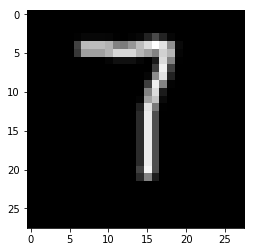

In [115]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1,random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train)
print(y_test)
plt.imshow(X_train[4],cmap = 'gray')

Text(0.5,1,'Class 354')

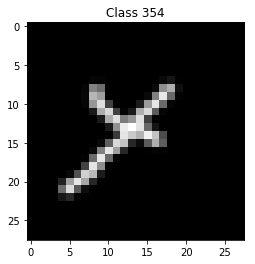

In [116]:
plt.imshow(X_train[12], cmap='gray')
plt.title('Class '+ str(y_train[12]))

In [117]:
number_of_classes = 1623
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)


(y_test[1],Y_test[1])

(250, array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32))

In [118]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [119]:


model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3 )))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

# Fully connected layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.8))
model.add(Dense(1623))

model.add(Activation('softmax'))

In [120]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_133 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_134 (Bat (None, 26, 26, 32)        128       
_________________________________________________________________
activation_156 (Activation)  (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_134 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_135 (Bat (None, 24, 24, 32)        128       
_________________________________________________________________
activation_157 (Activation)  (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_65 (MaxPooling (None, 12, 12, 32)        0         
__________

In [121]:


gen = ImageDataGenerator()

test_gen = ImageDataGenerator()
train_generator = gen.flow(X_train, Y_train, batch_size=32)
test_generator = test_gen.flow(X_test, Y_test, batch_size=32)


In [123]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(),metrics=['accuracy'])

In [124]:
model.fit_generator(train_generator, epochs=100, 
                    validation_data=test_generator)

Epoch 1/100
913/913 [==============================] - 175s 192ms/step - loss: 7.5246 - acc: 0.0111 - val_loss: 5.0603 - val_acc: 0.1063
Epoch 2/100
913/913 [==============================] - 174s 191ms/step - loss: 5.6072 - acc: 0.0609 - val_loss: 3.9897 - val_acc: 0.2461
Epoch 3/100
913/913 [==============================] - 176s 193ms/step - loss: 4.6027 - acc: 0.1286 - val_loss: 2.9264 - val_acc: 0.4100
Epoch 4/100
913/913 [==============================] - 176s 193ms/step - loss: 3.8212 - acc: 0.2066 - val_loss: 2.2942 - val_acc: 0.5068
Epoch 5/100
913/913 [==============================] - 176s 192ms/step - loss: 3.2296 - acc: 0.2806 - val_loss: 1.8474 - val_acc: 0.5650
Epoch 6/100
913/913 [==============================] - 176s 193ms/step - loss: 2.7659 - acc: 0.3513 - val_loss: 1.4828 - val_acc: 0.6396
Epoch 7/100
913/913 [==============================] - 175s 191ms/step - loss: 2.4246 - acc: 0.4106 - val_loss: 1.3261 - val_acc: 0.6657
Epoch 8/100
913/913 [====================

913/913 [==============================] - 176s 192ms/step - loss: 0.4502 - acc: 0.8527 - val_loss: 0.5870 - val_acc: 0.8401
Epoch 61/100
913/913 [==============================] - 176s 193ms/step - loss: 0.4409 - acc: 0.8545 - val_loss: 0.5665 - val_acc: 0.8478
Epoch 62/100
913/913 [==============================] - 177s 194ms/step - loss: 0.4341 - acc: 0.8574 - val_loss: 0.5596 - val_acc: 0.8481
Epoch 63/100
913/913 [==============================] - 176s 193ms/step - loss: 0.4356 - acc: 0.8583 - val_loss: 0.6307 - val_acc: 0.8413
Epoch 64/100
913/913 [==============================] - 177s 194ms/step - loss: 0.4213 - acc: 0.8610 - val_loss: 0.5988 - val_acc: 0.8426
Epoch 65/100
913/913 [==============================] - 177s 194ms/step - loss: 0.4273 - acc: 0.8593 - val_loss: 0.5837 - val_acc: 0.8435
Epoch 66/100
913/913 [==============================] - 177s 193ms/step - loss: 0.4096 - acc: 0.8649 - val_loss: 0.5942 - val_acc: 0.8447
Epoch 67/100
913/913 [=========================

In [125]:

 
score = model.evaluate(X_test, Y_test)
print()
print('Test loss: ', score[0])
print('Test Accuracy', score[1])



3246/3246 [==============================] - 6s 2ms/step

Test loss:  0.594996739484
Test Accuracy 0.855514479433


In [127]:


predictions = model.predict_classes(X_test)

predictions = list(predictions)
actuals = list(y_test)

sub = pd.DataFrame({'Actual': actuals, 'Predictions': predictions})
sub.to_csv('./output_cnn.csv', index=False)

